In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage import data
from skimage.feature import match_template
from skimage import color

arma_file="./data/arma.jpg"
kit1_file="./data/kit1.jpg"
template = io.imread(arma_file)
image= io.imread(kit1_file)
template=color.rgb2gray(template)
image=color.rgb2gray(image)

In [18]:
result = match_template(image, template)
print(result.shape,image.shape)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y= ij[::-1]

(312, 378) (367, 489)


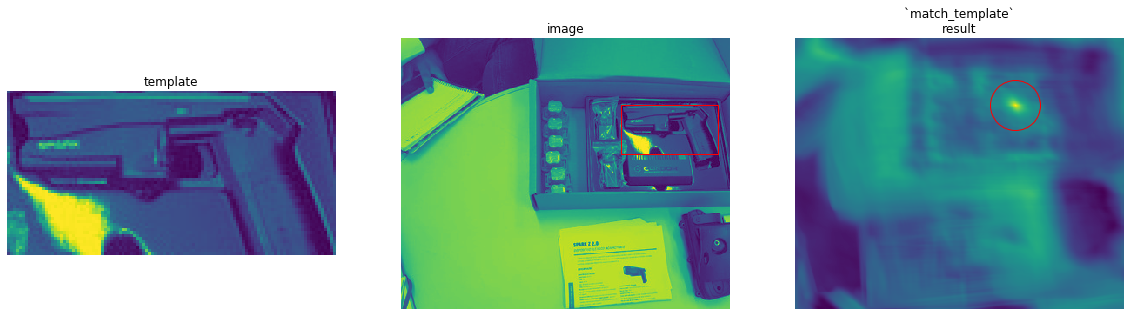

In [23]:
fig = plt.figure(figsize=(20,15))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3, sharex=ax2, sharey=ax2)

ax1.imshow(template)
ax1.set_axis_off()
ax1.set_title('template')

ax2.imshow(image)
ax2.set_axis_off()
ax2.set_title('image')
# highlight matched region
hcoin, wcoin = template.shape
rect = plt.Rectangle((x, y), wcoin, hcoin, edgecolor='r', facecolor='none')
ax2.add_patch(rect)

ax3.imshow(result)
ax3.set_axis_off()
ax3.set_title('`match_template`\nresult')
# highlight matched region
ax3.autoscale(False)
ax3.plot(x, y, 'o', markeredgecolor='r', markerfacecolor='none', markersize=50)

plt.show()